### Decision Trees: Classification & Regression – ML Journey Day X
This notebook demonstrates:
- Building Decision Tree Classifier on Credit Risk data  
- Building Decision Tree Regressor on Car Price data  
- Encoding methods (OneHot, Ordinal, Label Encoding)  
- Manual Regression Tree split calculation  

## Preparing Credit Dataset  
- We first create a small synthetic credit dataset for learning decision trees.

In [1]:
%%writefile credit_data.csv
Credit,Term,Income,y
fair,3 yrs,high,safe
fair,5 yrs,low,risky
fair,3 yrs,high,safe
poor,5 yrs,high,risky
poor,3 yrs,low,risky
fair,5 yrs,low,safe
poor,3 yrs,high,risky
poor,5 yrs,low,safe
fair,3 yrs,high,safe

Writing credit_data.csv


In [7]:
import pandas as pd

## Load Credit Dataset  
Reading the credit data from Excel/CSV to begin preprocessing.


In [8]:
data = pd.read_csv(r"C:\Users\sande\Downloads\credit_data.xls")

In [9]:
data

,Credit,Term,Income,y
0,fair,3 yrs,high,safe
1,fair,5 yrs,low,risky
2,fair,3 yrs,high,safe
3,poor,5 yrs,high,risky
4,poor,3 yrs,low,risky
5,fair,5 yrs,low,safe
6,poor,3 yrs,high,risky
7,poor,5 yrs,low,safe
8,fair,3 yrs,high,safe


In [10]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

## OneHot Encoding for Categorical Features  
- We use OneHotEncoding for the `Term` feature since it has no natural order.


In [11]:
ohe = OneHotEncoder(sparse_output=False, drop = 'first').set_output(transform = 'pandas')
ohe

OneHotEncoder(drop='first', sparse_output=False)

## Ordinal Encoding for Ordered Categories  
- Credit (poor < fair < good) and Income (low < high) can be encoded using OrdinalEncoder.


In [12]:
oe = OrdinalEncoder(categories = [['poor', 'fair'], ['low', 'high']]).set_output(transform = 'pandas')
oe

OrdinalEncoder(categories=[['poor', 'fair'], ['low', 'high']])

## Label Encoding Target Variable  
- The output label `y` (safe / risky) is encoded using label encoding.


In [13]:
le = LabelEncoder()
le

LabelEncoder()

In [14]:
data['Term'] = ohe.fit_transform(data[['Term']])
data.head()

,Credit,Term,Income,y
0,fair,0.0,high,safe
1,fair,1.0,low,risky
2,fair,0.0,high,safe
3,poor,1.0,high,risky
4,poor,0.0,low,risky


In [15]:
data[['Credit', 'Income']]=oe.fit_transform(data[['Credit','Income']])
data.head()

,Credit,Term,Income,y
0,1.0,0.0,1.0,safe
1,1.0,1.0,0.0,risky
2,1.0,0.0,1.0,safe
3,0.0,1.0,1.0,risky
4,0.0,0.0,0.0,risky


In [16]:
data['y'] = le.fit_transform(data['y'])
data.head()

,Credit,Term,Income,y
0,1.0,0.0,1.0,1
1,1.0,1.0,0.0,0
2,1.0,0.0,1.0,1
3,0.0,1.0,1.0,0
4,0.0,0.0,0.0,0


## Building the Decision Tree Classifier  
- We train a classifier to predict whether a customer is safe or risky.


In [17]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [18]:
dt = DecisionTreeClassifier()
dt

DecisionTreeClassifier()

In [19]:
data.columns

Index(['Credit', 'Term', 'Income', 'y'], dtype='object')

In [20]:
X = data.drop('y', axis = 1)
y = data['y']

In [21]:
dt.fit(X, y)

DecisionTreeClassifier()

In [22]:
import matplotlib.pyplot as plt

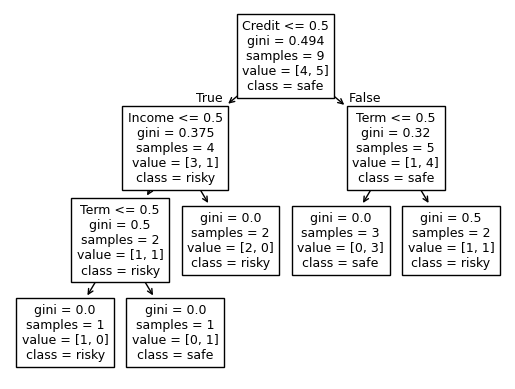

In [23]:
plot_tree(dt, feature_names = X.columns,
          class_names = ['risky', 'safe'],
          fontsize = 9)
plt.show()

%%writefile car_sale_data.csv
Distance,"Year","Brand","Engine_Size","Car_Weight","Price"
30,2019,"Toyota",2.0,1500,20
45,2018,"Ford",1.8,1400,15
20,2019,"Toyota",3.0,1600,35
60,2018,"Toyota",2.2,1550,13
15,2019,"Ford",1.6,1350,22
70,2019,"Ford",3.2,1650,18
40,2018,"Toyota",2.1,1520,17


# Regression Tree Example – Car Price Prediction  
- Now we move to Decision Tree Regression using a car dataset.


In [24]:
%%writefile car_sale_data.csv
Distance,"Year","Brand","Engine_Size","Car_Weight","Price"
30,2019,"Toyota",2.0,1500,20
45,2018,"Ford",1.8,1400,15
20,2019,"Toyota",3.0,1600,35
60,2018,"Toyota",2.2,1550,13
15,2019,"Ford",1.6,1350,22
70,2019,"Ford",3.2,1650,18
40,2018,"Toyota",2.1,1520,17

Overwriting car_sale_data.csv


In [25]:
data = pd.read_csv(r"C:\Users\sande\Downloads\car_sale_data.xls")

In [26]:
data

,Distance,Year,Brand,Engine_Size,Car_Weight,Price
0,30,2019,Toyota,2.0,1500,20
1,45,2018,Ford,1.8,1400,15
2,20,2019,Toyota,3.0,1600,35
3,60,2018,Toyota,2.2,1550,13
4,15,2019,Ford,1.6,1350,22
5,70,2019,Ford,3.2,1650,18
6,40,2018,Toyota,2.1,1520,17


## Encoding Categorical Features (Cars Dataset)  
- Year and Brand are transformed into numerical form using OneHotEncoding.


In [27]:
ohe = OneHotEncoder(sparse_output= False, drop = 'first').set_output(transform = 'pandas')
ohe

OneHotEncoder(drop='first', sparse_output=False)

In [28]:
data[['Year', 'Brand']] = ohe.fit_transform(data[['Year', 'Brand']])
data

,Distance,Year,Brand,Engine_Size,Car_Weight,Price
0,30,1.0,1.0,2.0,1500,20
1,45,0.0,0.0,1.8,1400,15
2,20,1.0,1.0,3.0,1600,35
3,60,0.0,1.0,2.2,1550,13
4,15,1.0,0.0,1.6,1350,22
5,70,1.0,0.0,3.2,1650,18
6,40,0.0,1.0,2.1,1520,17


In [29]:
X = data.drop('Price', axis = 1)
y = data['Price']

In [30]:
from sklearn.tree import DecisionTreeRegressor

## Training Decision Tree Regressor  
- We build a regression tree to predict car selling price.


In [31]:
dt = DecisionTreeRegressor()
dt

DecisionTreeRegressor()

In [32]:
dt.fit(X, y)

DecisionTreeRegressor()

## Visualizing the Regression Tree  
- Here we plot the trained regression tree to understand decision splits.


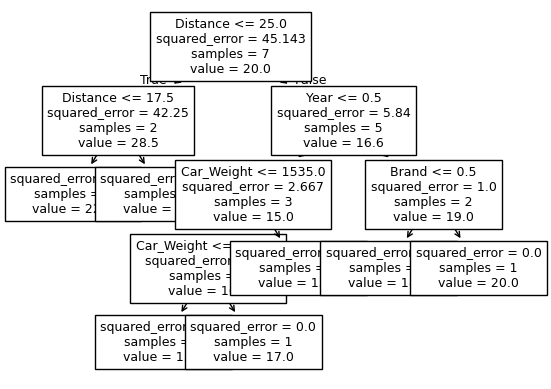

In [33]:
plot_tree(dt, feature_names = X.columns, fontsize = 9)
plt.show()

In [34]:
data

,Distance,Year,Brand,Engine_Size,Car_Weight,Price
0,30,1.0,1.0,2.0,1500,20
1,45,0.0,0.0,1.8,1400,15
2,20,1.0,1.0,3.0,1600,35
3,60,0.0,1.0,2.2,1550,13
4,15,1.0,0.0,1.6,1350,22
5,70,1.0,0.0,3.2,1650,18
6,40,0.0,1.0,2.1,1520,17


In [35]:
sort_data = data.sort_values('Distance')
sort_data

,Distance,Year,Brand,Engine_Size,Car_Weight,Price
4,15,1.0,0.0,1.6,1350,22
2,20,1.0,1.0,3.0,1600,35
0,30,1.0,1.0,2.0,1500,20
6,40,0.0,1.0,2.1,1520,17
1,45,0.0,0.0,1.8,1400,15
3,60,0.0,1.0,2.2,1550,13
5,70,1.0,0.0,3.2,1650,18


### Manual Split Calculation (Regression Tree)
To understand how regression trees choose the best split, we manually compute:
- Variance for left/right nodes  
- Weighted variance  
- Variance reduction  


In [36]:
# Before split
sort_data['Price'].var(ddof = 0)

45.142857142857146

In [37]:
sort_data.iloc[:3, 5].var(ddof = 0), sort_data.iloc[3:, 5].var(ddof = 0)

(44.22222222222222, 3.6875)

In [38]:
(3/7)*sort_data.iloc[:3, 5].var(ddof = 0) + (4/7)*sort_data.iloc[3:, 5].var(ddof = 0)

21.05952380952381

In [39]:
45.142857142857146 - 16.242857142857144

28.900000000000002

### Summary  
- Learned Decision Tree Classifier using credit dataset  
- Learned Decision Tree Regressor using car dataset  
- Applied OneHot, Ordinal, and Label Encoding  
- Visualized decision tree  
- Performed manual regression split calculation  
